In [1]:
import sys
import os

import numpy as np
import pandas as pd
import torch
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
importances_df = pd.read_csv("../output/bestboost-importances-269.csv", index_col=0, header=0)

In [ ]:
importances_df

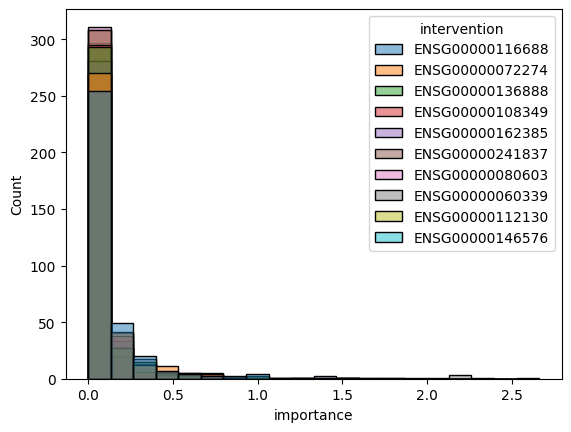

In [22]:
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
#     print(target_df.values[:, :-2].mean(axis=0))

    # select a random sample of interventions
    sampled_df = target_df.sample(n=10)
    # plot histogram of importances starting by pivoting all but the last two columns
    melted_target_df = sampled_df.melt(id_vars=["intervention"], value_vars=target_df.columns[:-2], var_name="candidate_gene_name", value_name="importance")
    
    
    sns.histplot(data=melted_target_df, x="importance", hue="intervention", bins=20)
    break

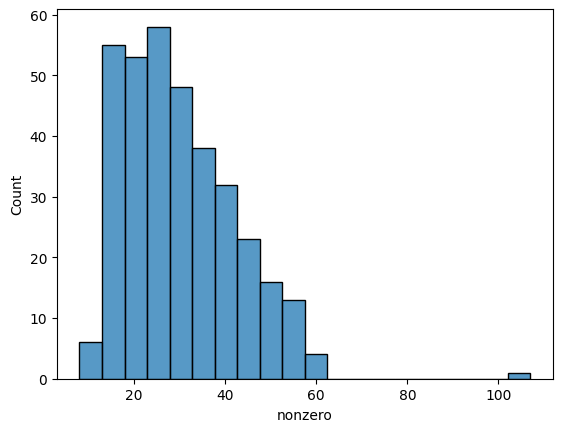

In [25]:
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(np.count_nonzero(target_df.values[:, :-2], axis=0).T, columns=["nonzero"])
    sns.histplot(data=mean_df, x="nonzero", bins=20)
    break

In [26]:
# check alignment with GRNboost importances
grn_df = pd.read_csv("../output/betterboost-269.csv", index_col=0, header=0)
grn_df

,TF,target,importance,pvalue,pvalue_rank
40,ENSG00000119777,ENSG00000149357,1.694209e-01,5.382712e-160,5.849869e-07
53,ENSG00000152253,ENSG00000187514,9.524327e+00,1.403224e-145,1.169974e-06
324,ENSG00000124207,ENSG00000123416,3.928002e+00,7.420609e-136,1.754961e-06
53,ENSG00000152253,ENSG00000123416,3.317504e+01,7.205032e-134,2.339948e-06
53,ENSG00000152253,ENSG00000164032,3.202419e+01,1.686162e-122,2.924934e-06
...,...,...,...,...,...
151,ENSG00000175283,ENSG00000153786,1.139026e-06,NaN,6.438307e-02
325,ENSG00000101138,ENSG00000232838,2.954962e-07,NaN,6.438366e-02
215,ENSG00000123200,ENSG00000153391,1.239089e-07,NaN,6.438424e-02
85,ENSG00000056097,ENSG00000156990,1.155037e-07,NaN,6.438483e-02


In [35]:
edge_importance_dfs = []
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(np.mean(target_df.values[:, :-2], axis=0).T, columns=["bestboost_mean_importance"])
    mean_df["bestboost_nonzero_ct"] = np.count_nonzero(target_df.fillna(0).values[:, :-2], axis=0)
    mean_df["TF"] = target_df.columns[:-2]
    mean_df["target"] = target
    edge_importance_dfs.append(mean_df)
edge_importance_df = pd.concat(edge_importance_dfs, axis=0)

In [37]:
edge_importance_df


,bestboost_mean_importance,bestboost_nonzero_ct,TF,target
0,NaN,0,ENSG00000242485,ENSG00000242485
1,0.237018,51,ENSG00000160075,ENSG00000242485
2,0.063641,29,ENSG00000120948,ENSG00000242485
3,0.043468,24,ENSG00000116670,ENSG00000242485
4,0.026281,15,ENSG00000116688,ENSG00000242485
...,...,...,...,...
342,0.104304,39,ENSG00000072506,ENSG00000071859
343,0.188207,52,ENSG00000102144,ENSG00000071859
344,0.084771,29,ENSG00000101972,ENSG00000071859
345,0.054674,28,ENSG00000071553,ENSG00000071859


In [38]:
# get intersection of these two dataframes
intersection_df = pd.merge(edge_importance_df, grn_df, how="inner", on=["TF", "target"])
intersection_df

,bestboost_mean_importance,bestboost_nonzero_ct,TF,target,importance,pvalue,pvalue_rank
0,0.237018,51,ENSG00000160075,ENSG00000242485,26.033576,9.168919e-11,0.001062
1,0.063641,29,ENSG00000120948,ENSG00000242485,0.228920,5.900477e-06,0.002467
2,0.036196,25,ENSG00000117751,ENSG00000242485,0.115384,3.414157e-03,0.005823
3,0.100286,42,ENSG00000126698,ENSG00000242485,3.751999,NaN,0.052070
4,0.040338,17,ENSG00000180198,ENSG00000242485,0.168941,8.035139e-04,0.004569
...,...,...,...,...,...,...,...
35619,0.073979,31,ENSG00000101158,ENSG00000071859,0.124401,NaN,0.060267
35620,0.04643,25,ENSG00000101166,ENSG00000071859,0.353941,1.247415e-03,0.004882
35621,0.116889,56,ENSG00000100129,ENSG00000071859,0.375555,NaN,0.056467
35622,0.032832,17,ENSG00000012174,ENSG00000071859,0.192551,NaN,0.058735


<Axes: xlabel='importance', ylabel='bestboost_mean_importance'>

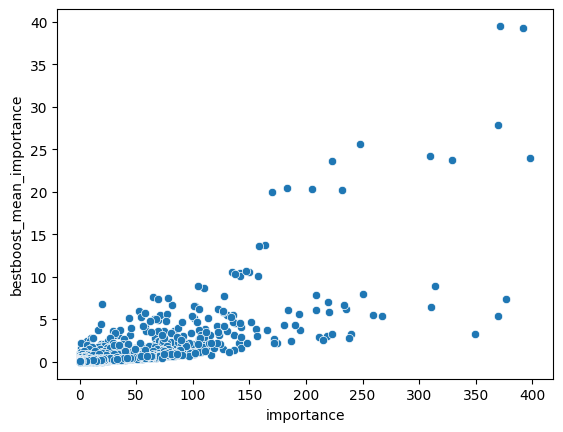

In [40]:
sns.scatterplot(intersection_df, x="importance", y="bestboost_mean_importance")

In [42]:
scipy.stats.pearsonr(x=intersection_df.importance, y=intersection_df.bestboost_mean_importance)

PearsonRResult(statistic=0.7261591435136671, pvalue=0.0)

<Axes: xlabel='importance', ylabel='bestboost_nonzero_ct'>

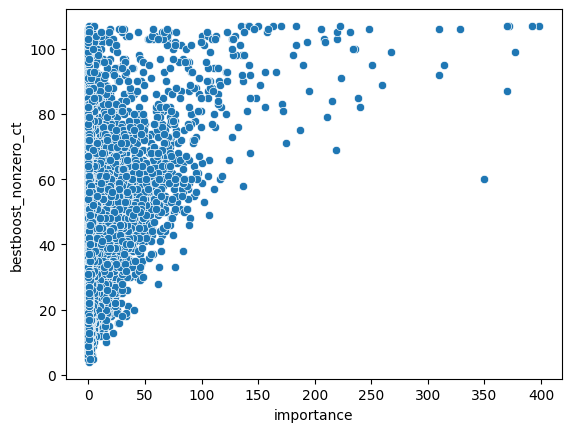

In [43]:
sns.scatterplot(intersection_df, x="importance", y="bestboost_nonzero_ct")

In [44]:
scipy.stats.pearsonr(x=intersection_df.importance, y=intersection_df.bestboost_nonzero_ct)

PearsonRResult(statistic=0.3424735957988059, pvalue=0.0)

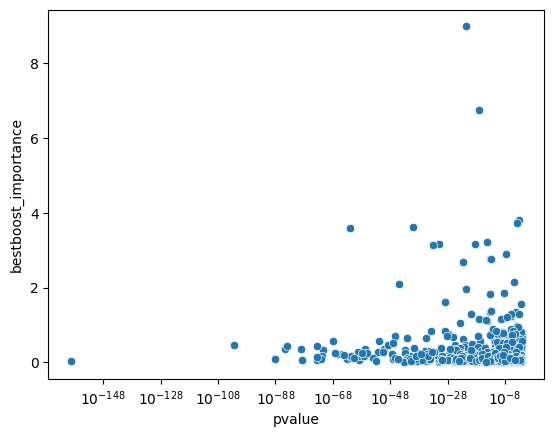

In [18]:
sns.scatterplot(intersection_df, x="pvalue", y="bestboost_importance") 
plt.xscale('log')

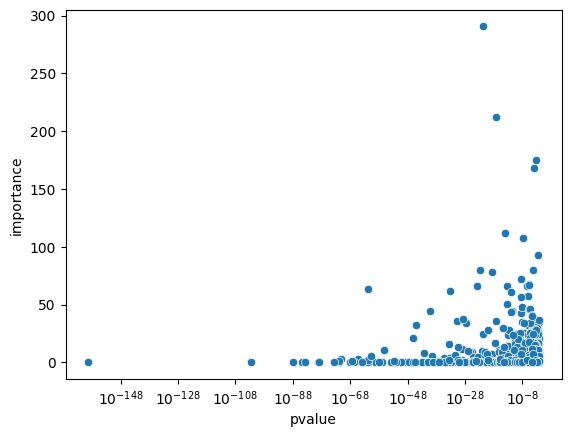

In [19]:
sns.scatterplot(intersection_df, x="pvalue", y="importance") 
plt.xscale('log')

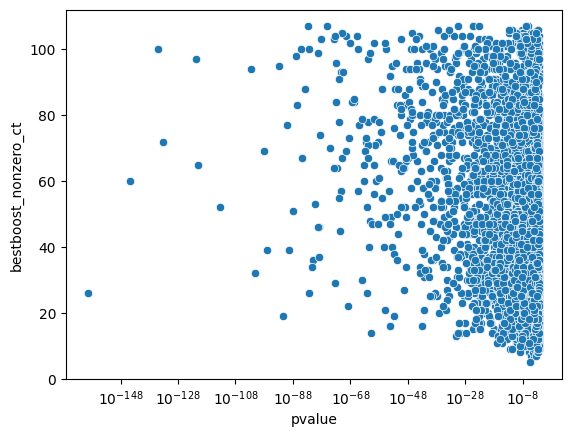

In [45]:
sns.scatterplot(intersection_df, x="pvalue", y="bestboost_nonzero_ct") 
plt.xscale('log')

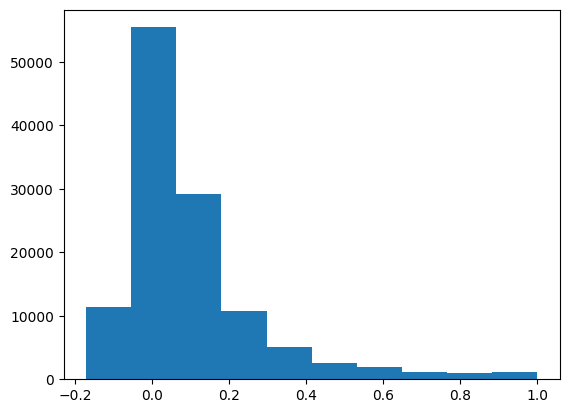

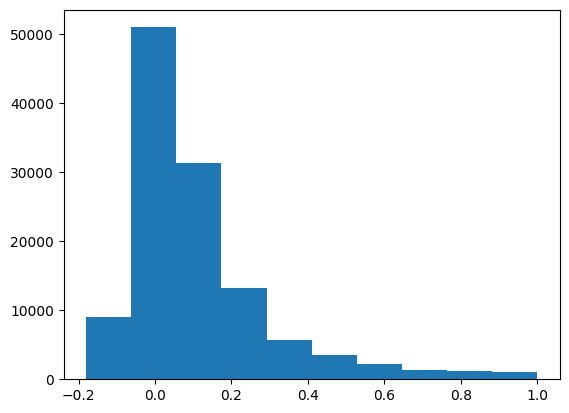

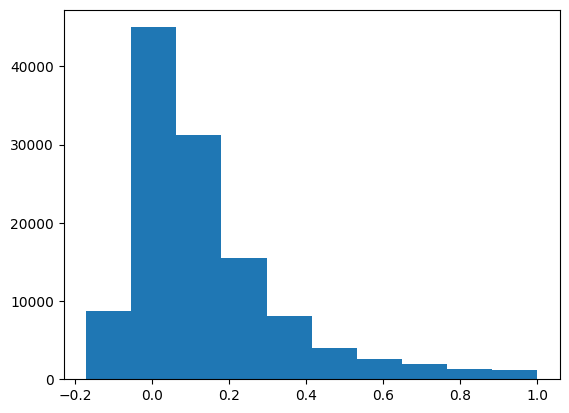

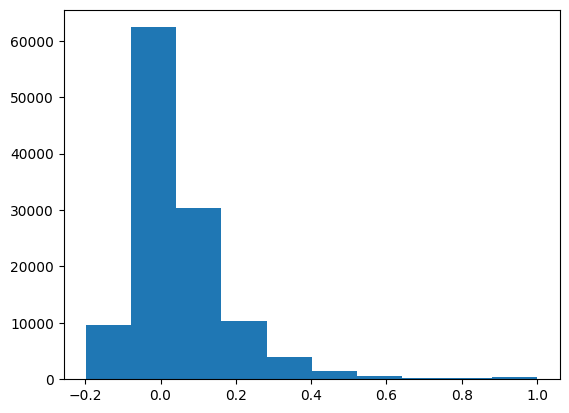

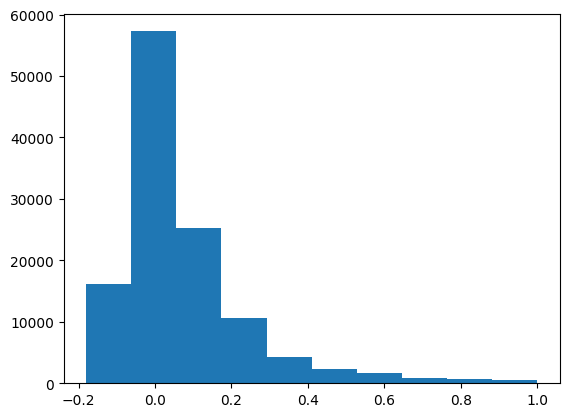

<Figure size 640x480 with 0 Axes>

In [71]:
for i, target in enumerate(importances_df["target"].unique()):
    target_df = importances_df[importances_df["target"] == target]
    corr_matrix = np.corrcoef(target_df.fillna(0.).values[:, :-2].astype(float), rowvar=False)
    plt.hist(corr_matrix.flatten())
    plt.show()
    plt.clf()
    if i > 3:
        break

In [72]:
# how much to relax condition until 1000 edges
quantiles = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
for quantile in quantiles:
    edge_importance_dfs = []
    for target in importances_df["target"].unique():
        target_df = importances_df[importances_df["target"] == target]
        mean_df = pd.DataFrame(np.quantile(target_df.values[:, :-2], quantile, axis=0).astype(float).T, columns=["bestboost_importance"])
        mean_df["TF"] = target_df.columns[:-2]
        mean_df["target"] = target
        edge_importance_dfs.append(mean_df)
    edge_importance_df = pd.concat(edge_importance_dfs, axis=0)
    edge_importance_df = edge_importance_df[edge_importance_df.bestboost_importance > 0]
    print(edge_importance_df.shape[0])

16
241
478
738
1110
1525


In [93]:
# look at 20th quantile and compare now
edge_importance_dfs = []
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(np.quantile(target_df.values[:, :-2], 0.3, axis=0).T, columns=["bestboost_importance"])
    mean_df["TF"] = target_df.columns[:-2]
    mean_df["target"] = target
    edge_importance_dfs.append(mean_df)
edge_importance_df = pd.concat(edge_importance_dfs, axis=0)
edge_importance_df["is_zero"] = edge_importance_df.bestboost_importance == 0
intersection_df = pd.merge(edge_importance_df, grn_df, how="inner", on=["TF", "target"])
intersection_df

,bestboost_importance,TF,target,is_zero,importance,pvalue,pvalue_rank
0,0.0,ENSG00000160075,ENSG00000242485,True,26.033576,9.168919e-11,0.001062
1,0.0,ENSG00000120948,ENSG00000242485,True,0.228920,5.900477e-06,0.002467
2,0.0,ENSG00000117751,ENSG00000242485,True,0.115384,3.414157e-03,0.005823
3,0.0,ENSG00000126698,ENSG00000242485,True,3.751999,NaN,0.052070
4,0.0,ENSG00000180198,ENSG00000242485,True,0.168941,8.035139e-04,0.004569
...,...,...,...,...,...,...,...
35619,0.0,ENSG00000101158,ENSG00000071859,True,0.124401,NaN,0.060267
35620,0.0,ENSG00000101166,ENSG00000071859,True,0.353941,1.247415e-03,0.004882
35621,0.0,ENSG00000100129,ENSG00000071859,True,0.375555,NaN,0.056467
35622,0.0,ENSG00000012174,ENSG00000071859,True,0.192551,NaN,0.058735


<Axes: xlabel='importance', ylabel='bestboost_importance'>

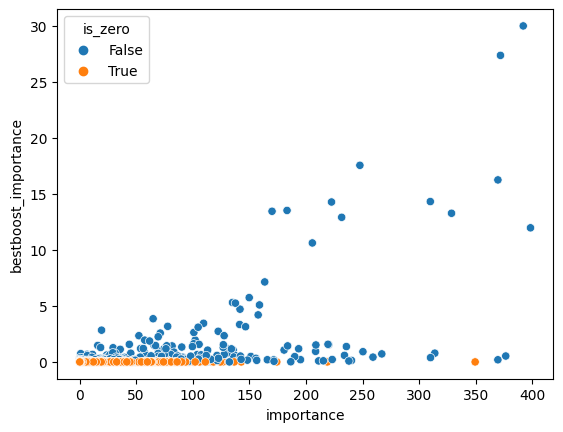

In [94]:
sns.scatterplot(intersection_df, x="importance", y="bestboost_importance", hue="is_zero")

(0.0, 1.0)

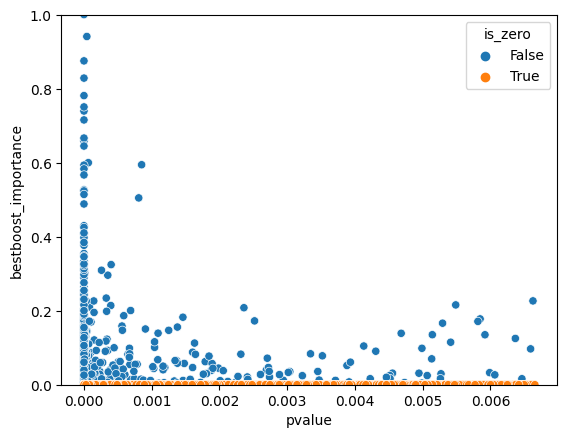

In [96]:
sns.scatterplot(intersection_df, x="pvalue", y="bestboost_importance", hue="is_zero")
plt.ylim((0,1))

In [97]:
len(intersection_df[~intersection_df.pvalue.isna()])

11382